In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns 
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [ ]:
data = pd.read_csv("diabetes(1).csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#Shape of Data
data.shape

(768, 9)

In [ ]:
#infromation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#lets describe the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
data.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

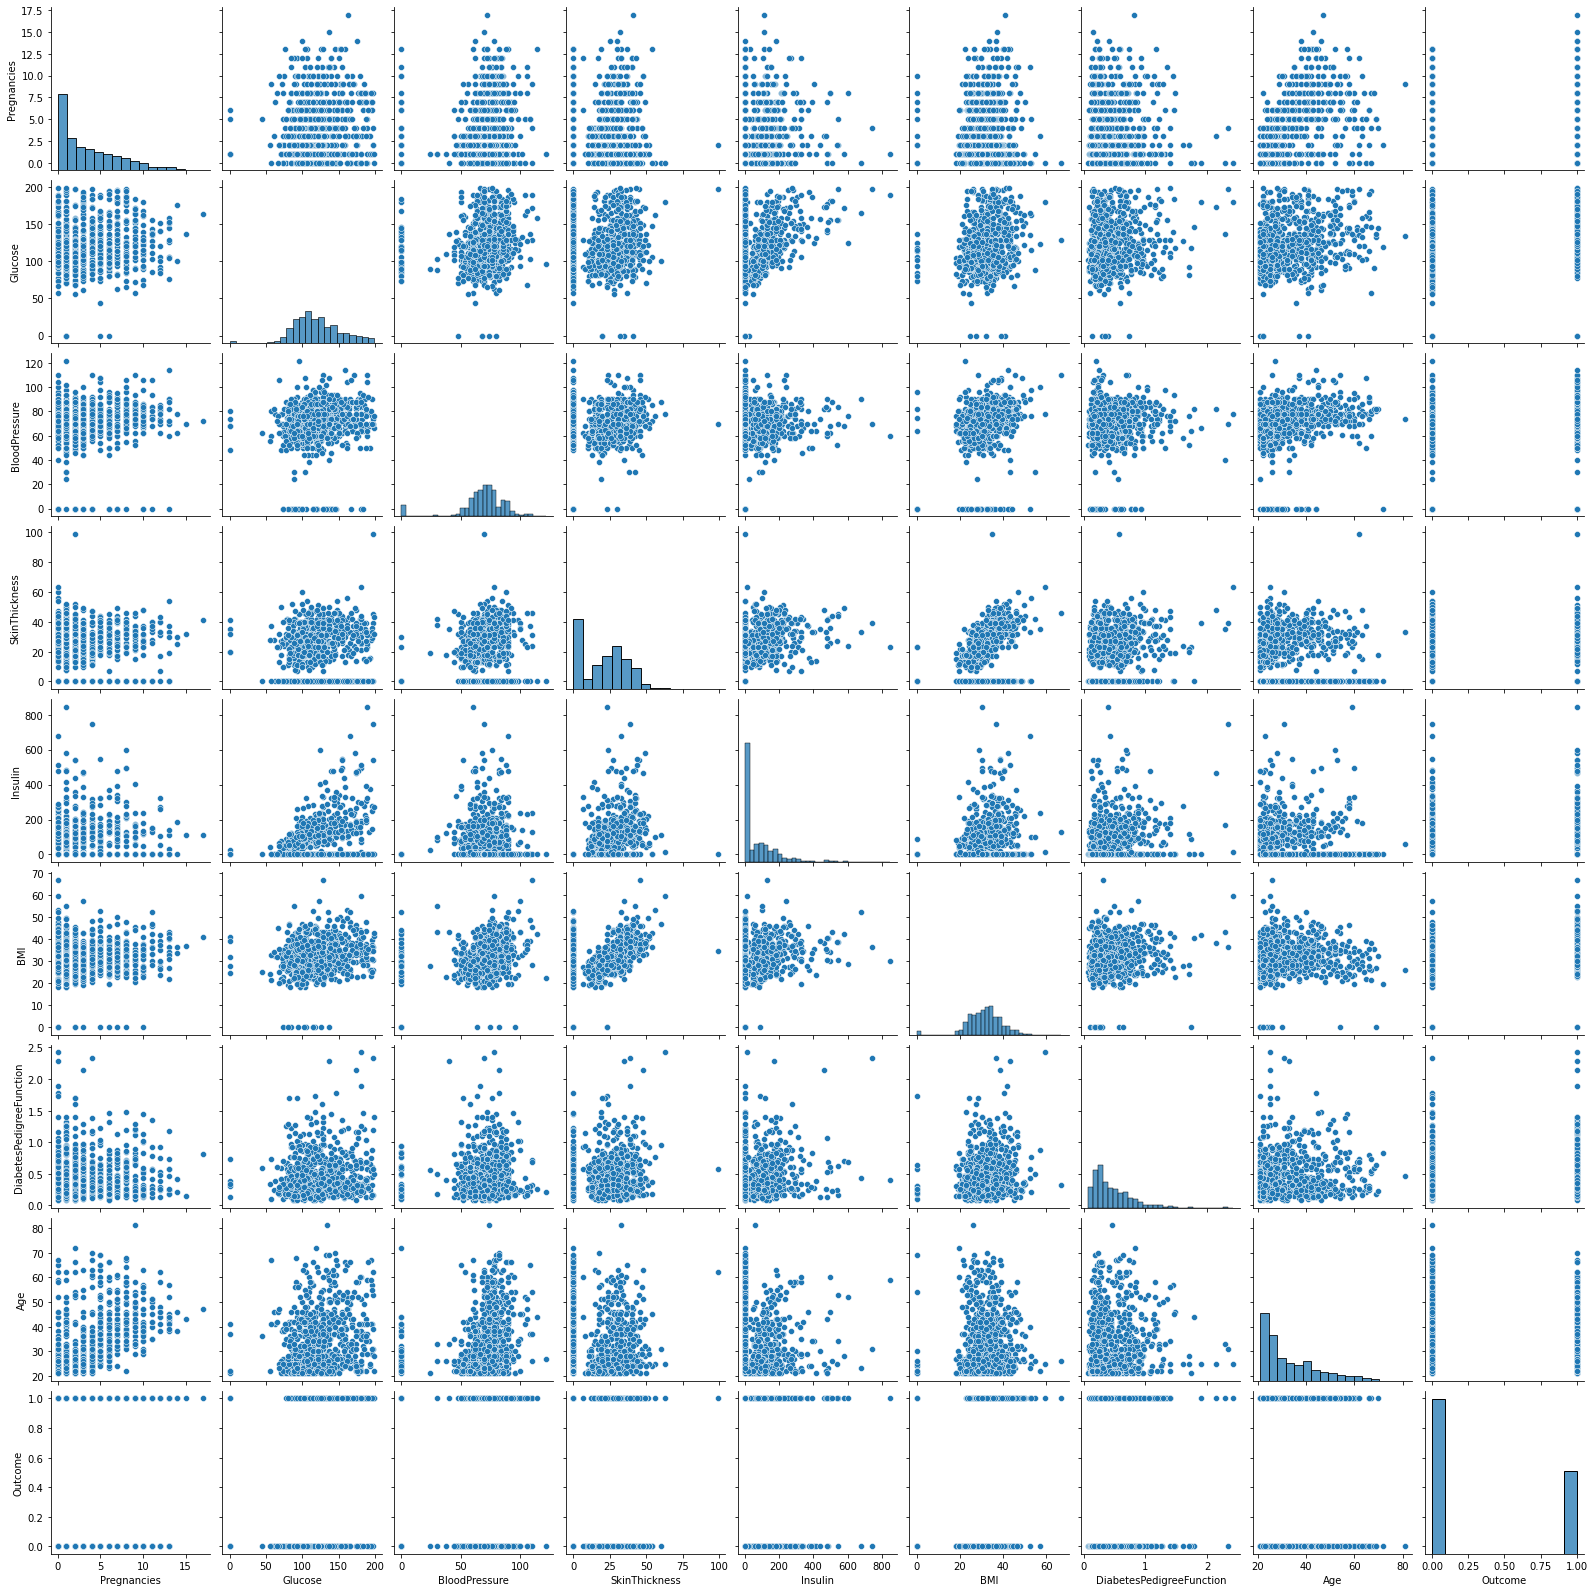

In [ ]:
sns.pairplot(data)

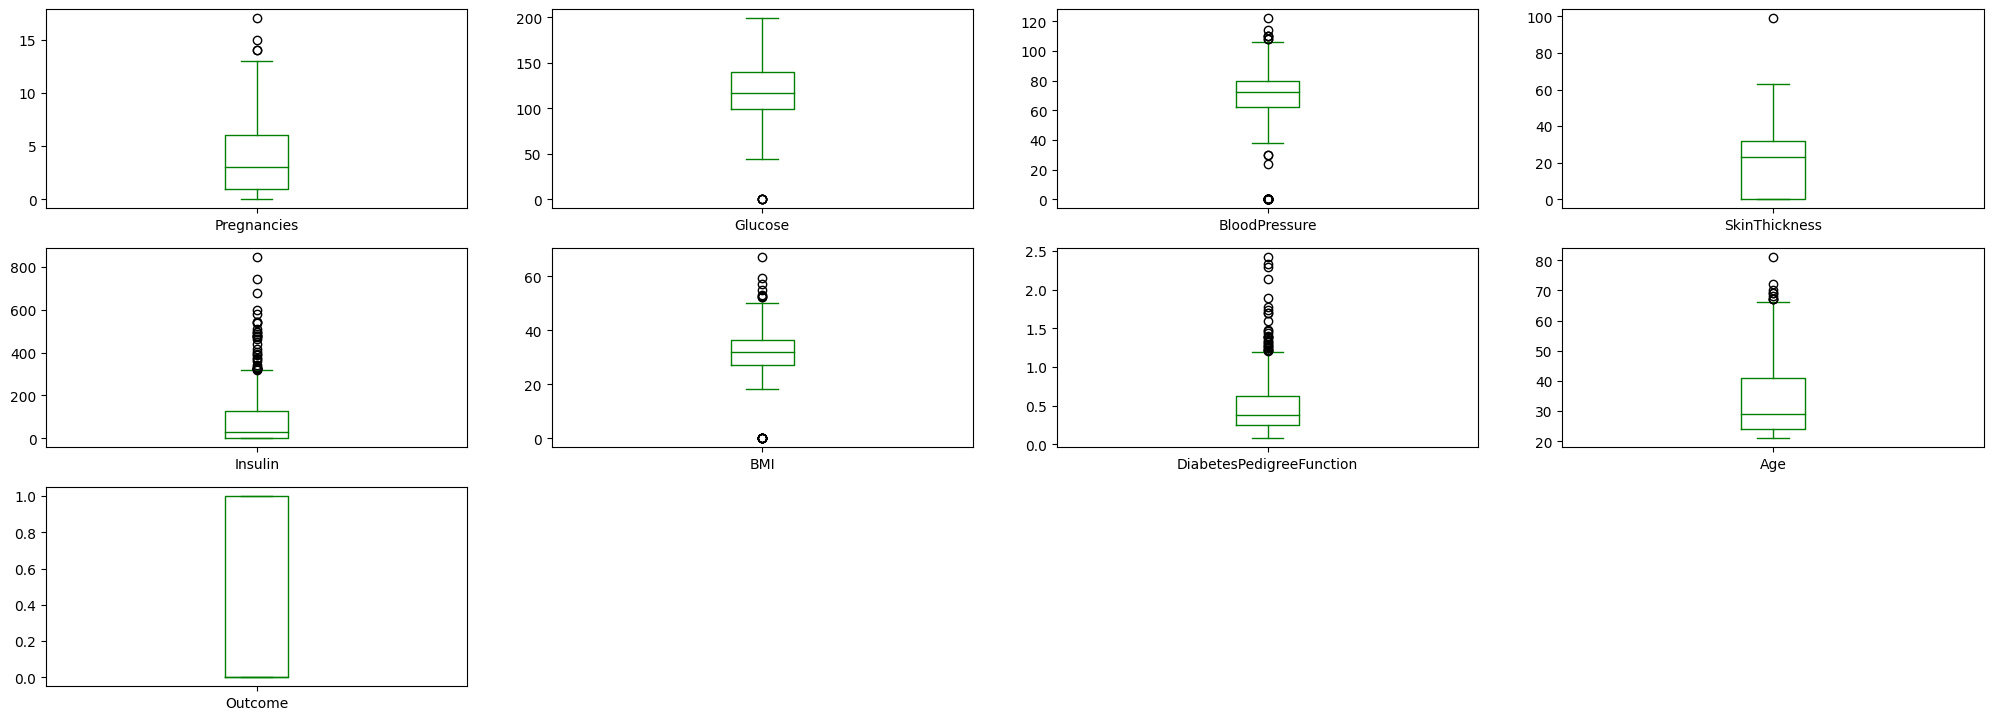

In [ ]:
data.plot(color = 'g', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

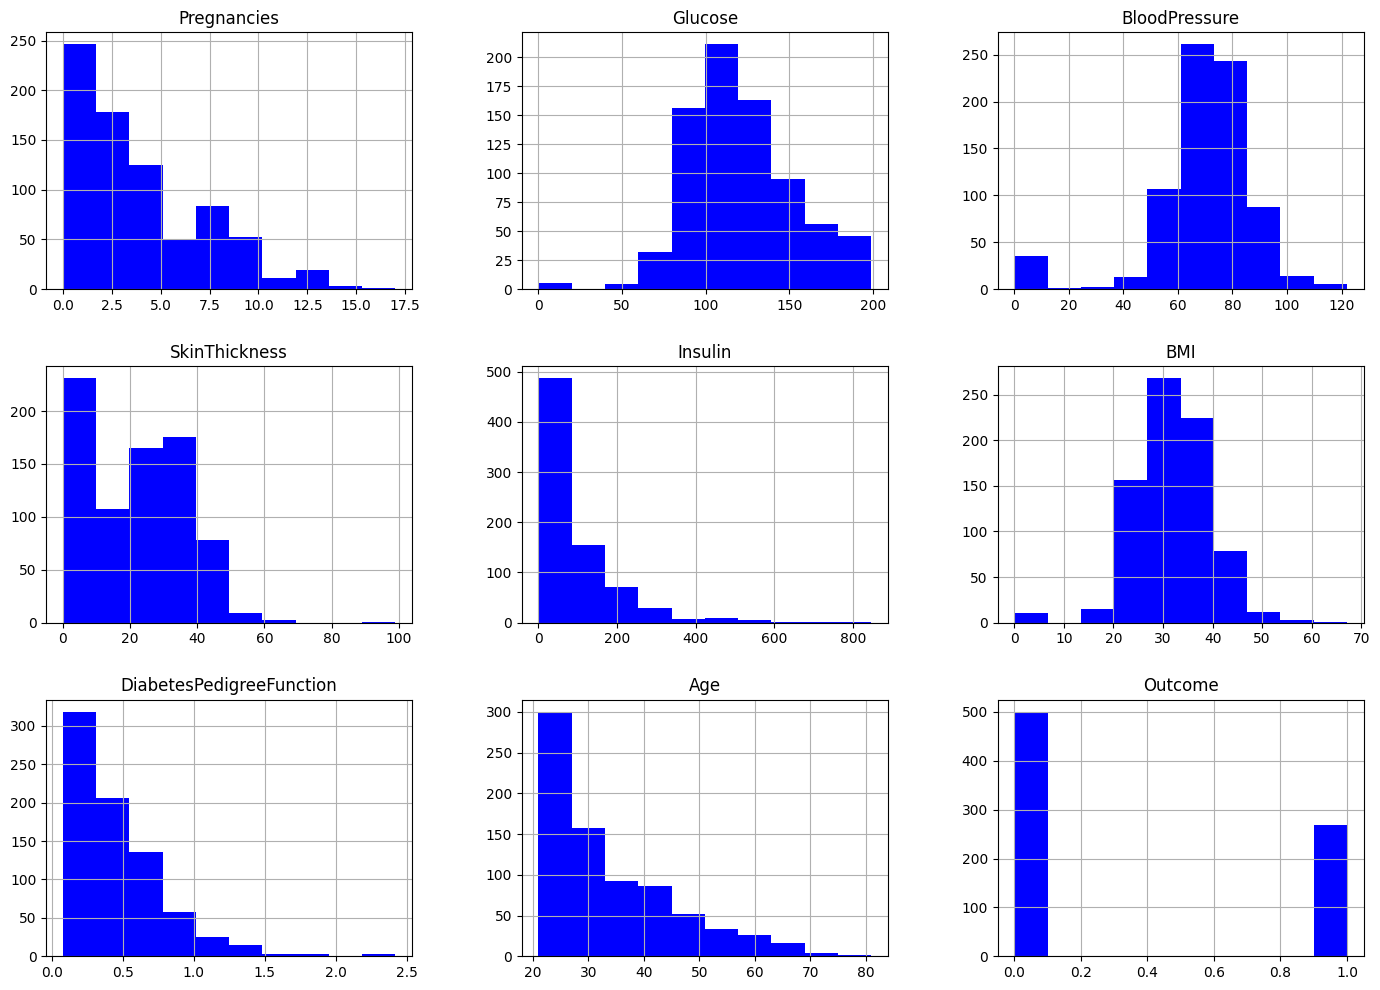

In [ ]:
#histogram
data.hist(color='Blue',bins=10,figsize=(17,12))
plt.show()

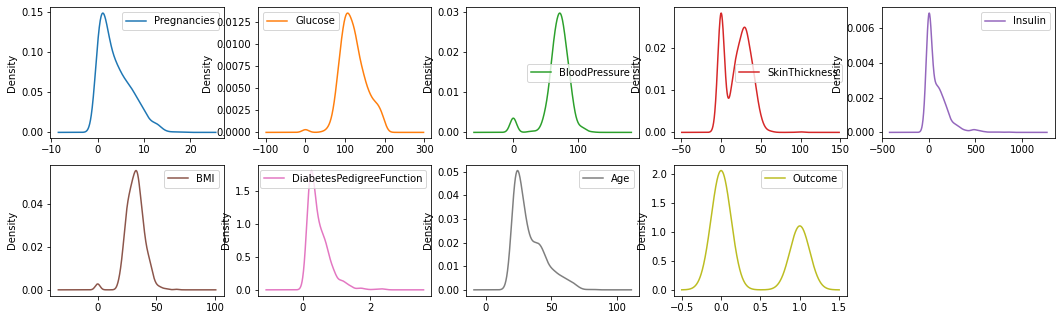

In [ ]:
#Boxplot of each column
data.plot( kind='density', figsize=(18,14), subplots=True, layout=(5,5),sharex=False)
plt.show()

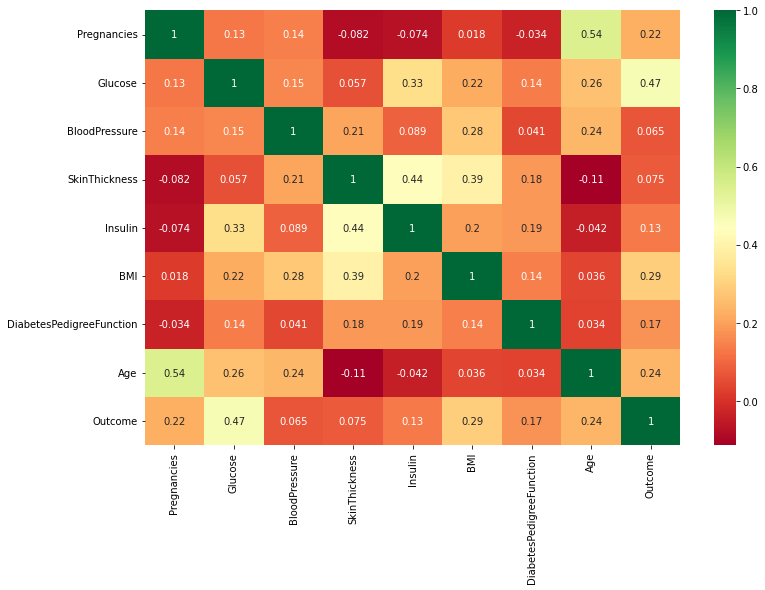

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# creating a for to replace outlayers using boxplot method
num_var=(data)
for i in num_var:
    # taking quantiles
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1 # calculating IQR
    data[i] = np.where(data[i]>(Q3+1.5*IQR),(Q3+1.5*IQR),data[i]) # removing outlayers
    data[i] = np.where(data[i]<(Q1-1.5*IQR),(Q1-1.5*IQR),data[i]) # removing outlayers

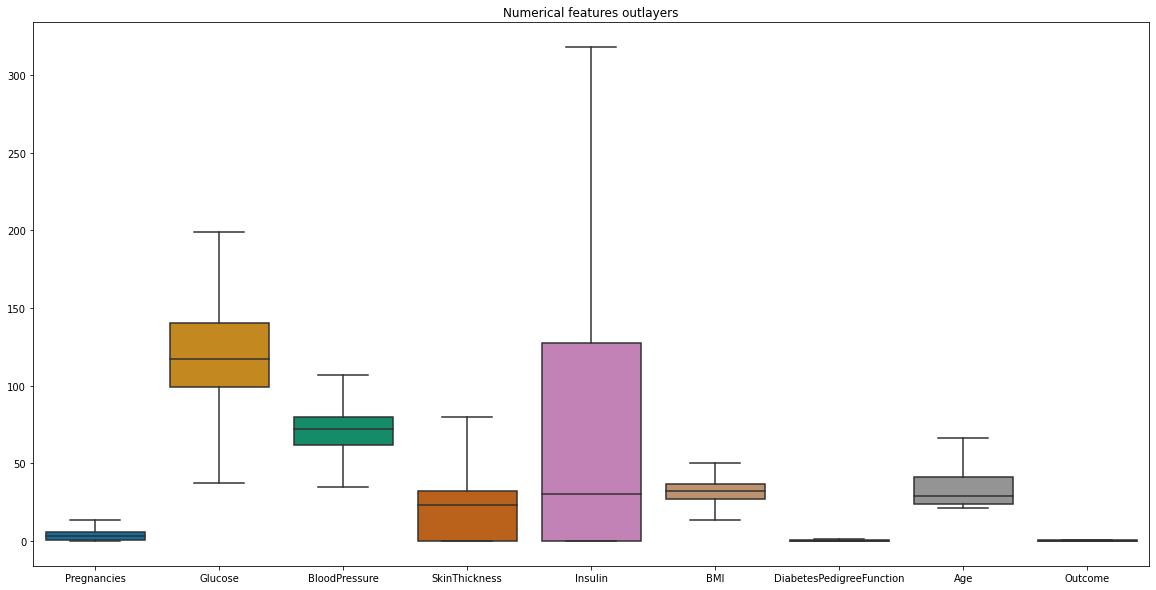

In [ ]:
# Plotting boxplots to numeric features
num_var = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


plt.figure(figsize=(20,10))
sns.boxplot(data=data[num_var], 
                 palette="colorblind")
plt.title('Numerical features outlayers');

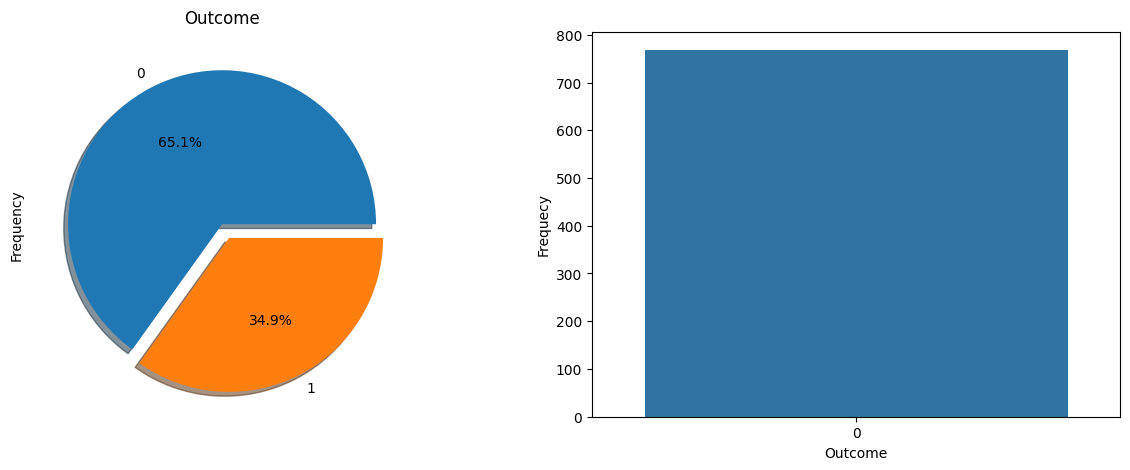

In [ ]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['Outcome'])
#plt.title("Frequency of Diabetes in Dataset")
plt.xlabel("Outcome")
plt.ylabel("Frequecy")

#Piechart show
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('Frequency')
plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#reading data from pandas
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv("diabetes(1).csv", header=1, names=col_names)

<AxesSubplot:>

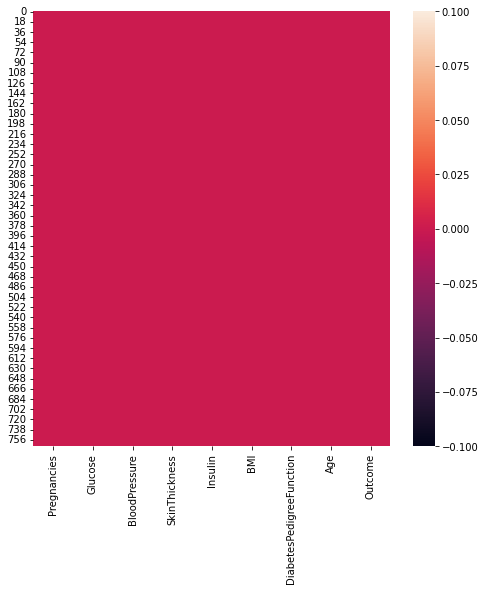

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [ ]:
data_boxcox = data.copy()
X = data_boxcox.drop(['Outcome'],axis=1)
Y = data_boxcox['Outcome']

In [ ]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.Outcome==0]
df_minority = data_bal[data_bal.Outcome==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class
df_manjority_downsampled = resample(df_majority,replace=False,n_samples=150,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.Outcome.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=300,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.Outcome.value_counts())

Downsampled data:->
 1    268
0    150
Name: Outcome, dtype: int64
Upsampled data:->
 0    500
1    300
Name: Outcome, dtype: int64


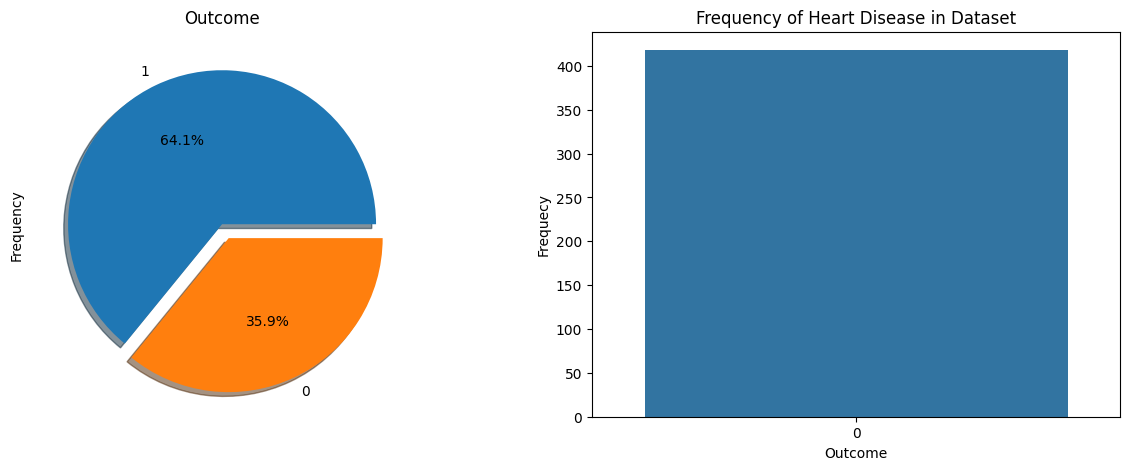

In [ ]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_downsampled['Outcome'])
plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")
plt.ylabel("Frequecy")

#Piechart show
df_downsampled['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('Frequency')
plt.show()

KeyError: ignored

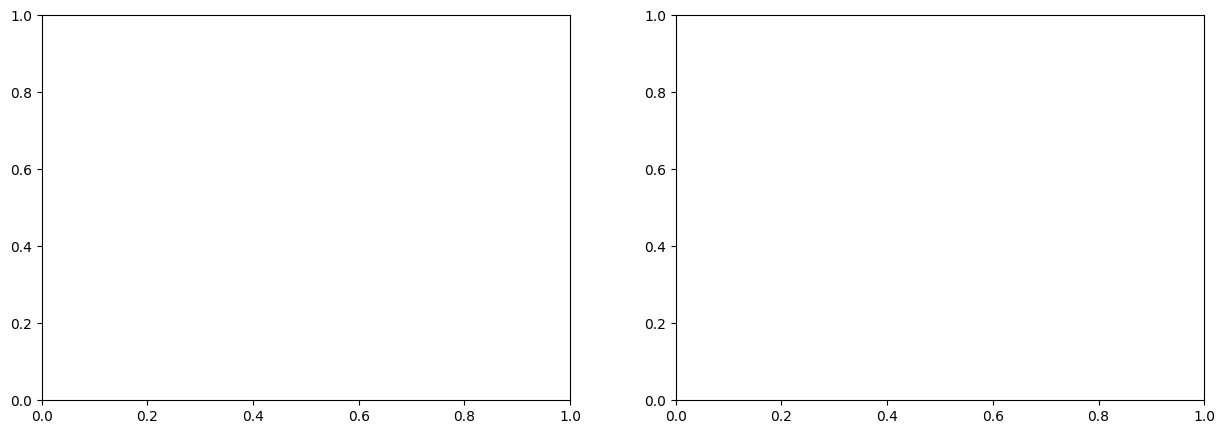

In [ ]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(df_upsampled['Outcome'])
plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")
plt.ylabel("Frequecy")
#Piechart show
df_upsampled['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('Frequency')
plt.show()

In [ ]:
#lets describe the data
df_upsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,800.0,3.971250,3.405131,0.000,1.00,3.00,6.00000,17.000
Glucose,800.0,120.882500,31.644081,0.000,99.00,117.00,140.00000,199.000
BloodPressure,800.0,69.061250,18.803043,0.000,62.00,72.00,80.00000,122.000
SkinThickness,800.0,20.701250,15.575389,0.000,0.00,23.00,33.00000,60.000
Insulin,800.0,83.248750,118.345232,0.000,0.00,44.00,130.00000,846.000
BMI,800.0,31.978125,7.677082,0.000,27.40,32.05,36.12500,67.100
DiabetesPedigreeFunction,800.0,0.474275,0.327778,0.078,0.24,0.38,0.64625,2.329
Age,800.0,33.176250,11.507964,21.000,24.00,29.00,41.00000,81.000
Outcome,800.0,0.375000,0.484426,0.000,0.00,0.00,1.00000,1.000


In [ ]:
#lets describe the data
df_downsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,418.0,4.301435,3.601898,0.000,1.00000,4.0000,7.000,17.00
Glucose,418.0,129.791866,33.596880,0.000,105.00000,126.0000,155.000,199.00
BloodPressure,418.0,69.966507,20.421196,0.000,64.00000,72.0000,80.000,114.00
SkinThickness,418.0,20.717703,16.621379,0.000,0.00000,24.0000,33.000,99.00
Insulin,418.0,89.744019,128.828419,0.000,0.00000,0.0000,145.750,846.00
BMI,418.0,33.156459,8.137271,0.000,28.75000,32.9000,37.575,67.10
DiabetesPedigreeFunction,418.0,0.513182,0.348768,0.085,0.25525,0.4215,0.686,2.42
Age,418.0,35.021531,11.885828,21.000,25.00000,32.0000,42.750,72.00
Outcome,418.0,0.641148,0.480238,0.000,0.00000,1.0000,1.000,1.00


/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


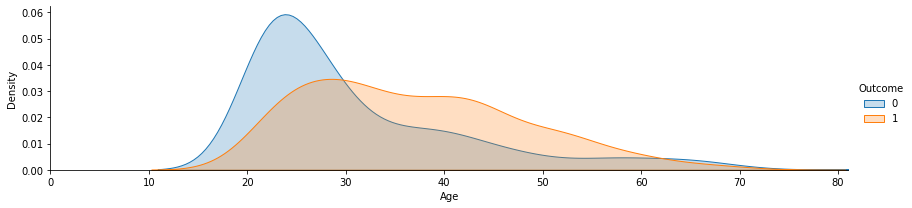

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


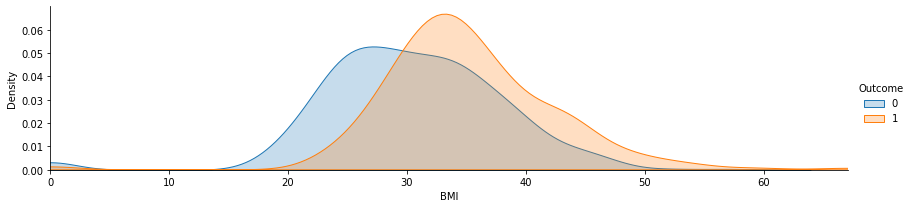

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BMI', shade=True)
oldest = data['BMI'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


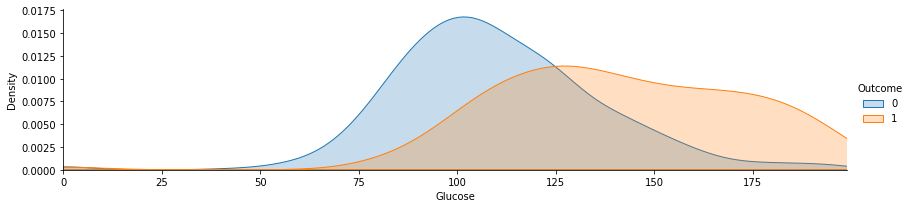

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Glucose', shade=True)
oldest = data['Glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


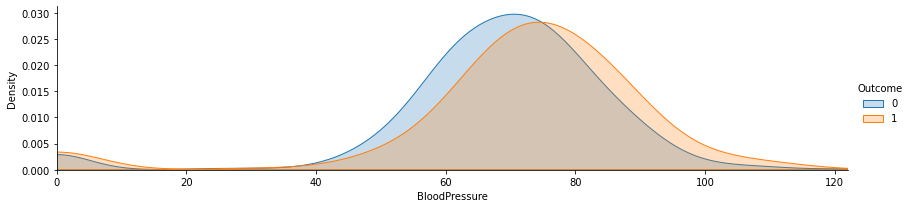

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'BloodPressure', shade=True)
oldest = data['BloodPressure'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


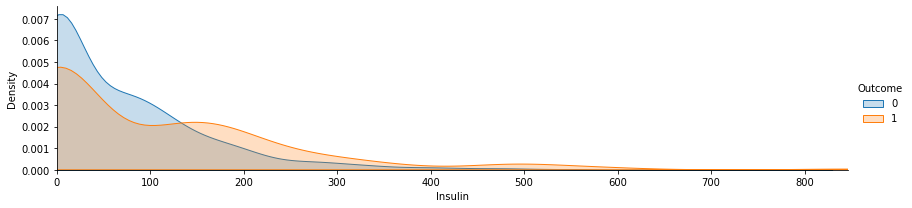

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'Insulin', shade=True)
oldest = data['Insulin'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


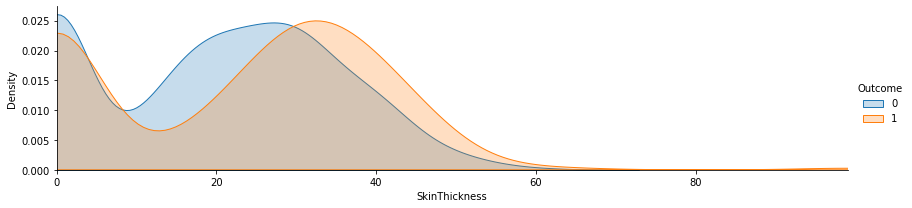

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot
fig = sns.FacetGrid(data, hue="Outcome", aspect=4)
fig.map(sns.kdeplot, 'SkinThickness', shade=True)
oldest = data['SkinThickness'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

<Figure size 2160x2160 with 0 Axes>

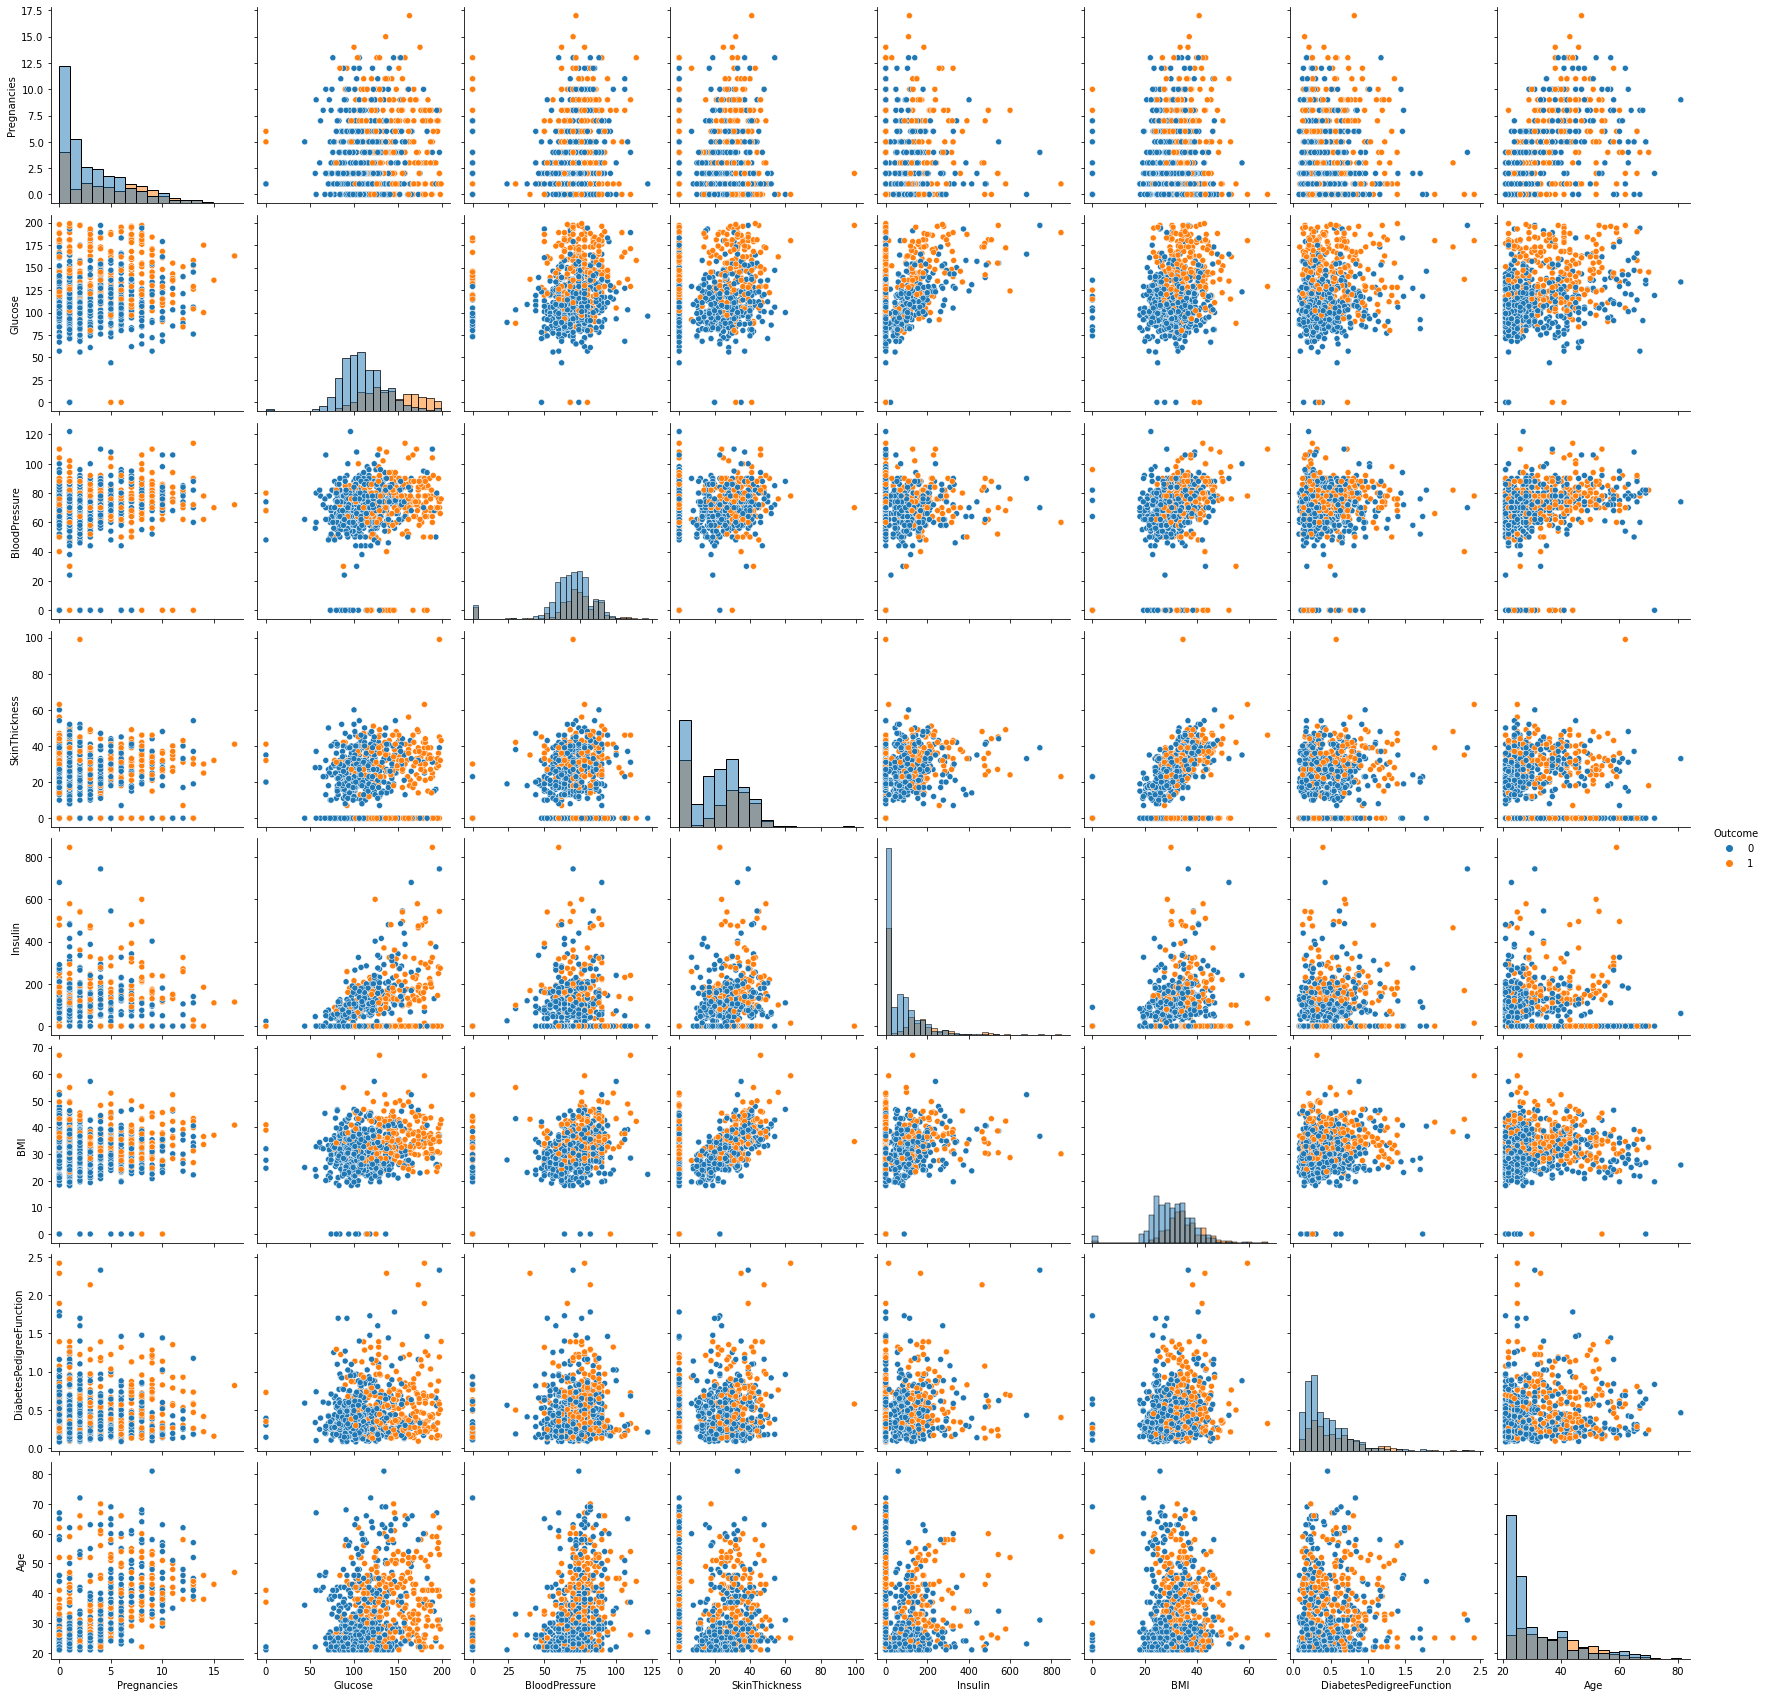

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, hue='Outcome', height=3, diag_kind='hist')

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.87      0.85      0.86        61

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


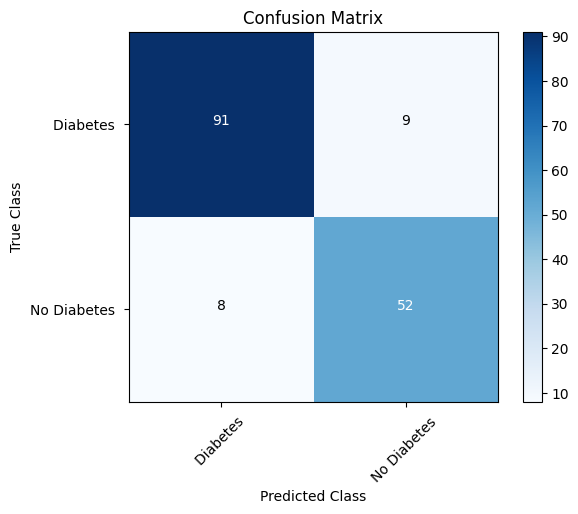

In [ ]:
from sklearn import  metrics 
X = df_upsampled.drop(['Outcome'],axis=1)
classes = ["Diabetes ", "No Diabetes "]
Y = df_upsampled['Outcome']
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#confusion_matrix(XGBR,X_test,y_test,labels=["Heart Disease","No-Heart Disease"],cm=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features = XGBR.feature_importances_
features

array([0.12342175, 0.12929842, 0.11219075, 0.09870323, 0.1951675 ,
       0.11702099, 0.10746135, 0.11673599], dtype=float32)

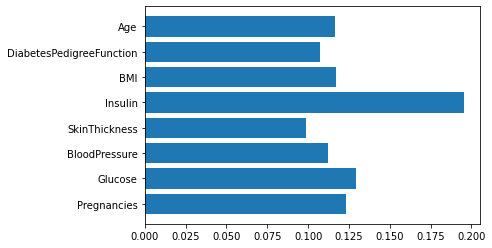

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [ ]:
X = np.array(df_upsampled[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']])
Y = np.array(df_upsampled.Outcome.T)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91        99
           1       0.87      0.85      0.86        61

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


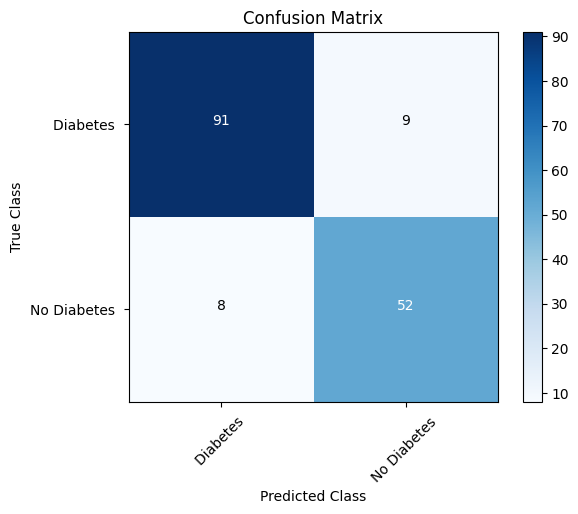

In [ ]:
#XGB
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model1 = XGBClassifier (learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

#(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
fpr_Model1, tpr_Model1, thresholds_Model1 = roc_curve(y_test, y_pred)
roc_auc_Model1 = auc (fpr_Model1, tpr_Model1)
precision_Model1, recall_Model1, th_Model1 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

#plot_confusion_matrix(Model1,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features =Model1.feature_importances_
features

array([0.12342175, 0.12929842, 0.11219075, 0.09870323, 0.1951675 ,
       0.11702099, 0.10746135, 0.11673599], dtype=float32)

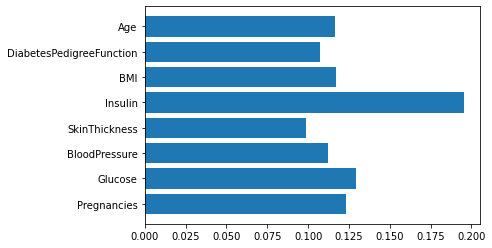

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        95
           1       0.90      0.83      0.86        65

    accuracy                           0.89       160
   macro avg       0.90      0.88      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


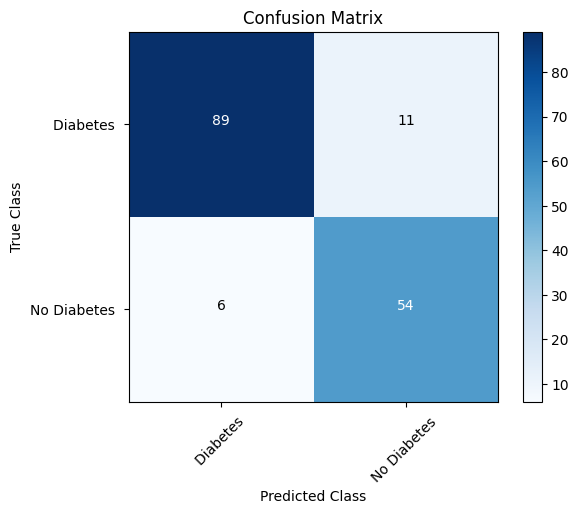

In [ ]:
#Ada Boost
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model2 = AdaBoostClassifier(n_estimators=20000,learning_rate=0.1,random_state=None)
#(random_state=0, learning_rate =0.1,n_estimators=100)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
fpr_Model2, tpr_Model2, thresholds_Model2 = roc_curve(y_test, y_pred)
roc_auc_Model2 = auc (fpr_Model2, tpr_Model2)
precision_Model2, recall_Model2, th_Model2 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model2,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features =Model2.feature_importances_
features

array([0.0207, 0.2296, 0.063 , 0.0595, 0.1042, 0.1827, 0.2834, 0.0569])

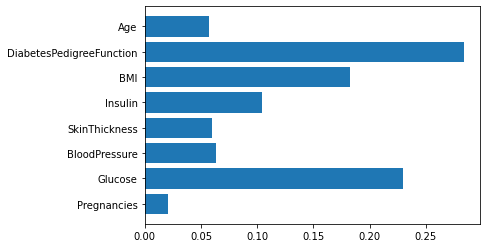

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

In [ ]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

              precision    recall  f1-score   support

           0       0.90      0.93      0.91        97
           1       0.88      0.84      0.86        63

    accuracy                           0.89       160
   macro avg       0.89      0.88      0.89       160
weighted avg       0.89      0.89      0.89       160

0.89375


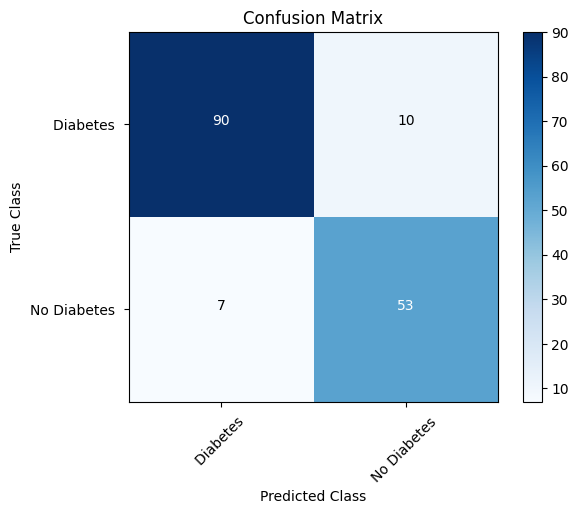

In [ ]:
# GB Boost
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model3 = GradientBoostingClassifier(random_state=45, learning_rate =0.1,n_estimators=10000,max_depth=10)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
fpr_Model3, tpr_Model3, thresholds_Model3 = roc_curve(y_test, y_pred)
roc_auc_Model3 = auc (fpr_Model3, tpr_Model3)
precision_Model3, recall_Model3, th_Model3 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model3,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features =Model3.feature_importances_
features

array([0.05957711, 0.30448904, 0.09349078, 0.04199026, 0.0695514 ,
       0.20814797, 0.13198112, 0.09077232])

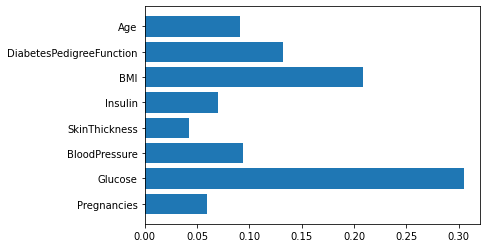

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

              precision    recall  f1-score   support

           0       0.89      0.91      0.90        98
           1       0.85      0.82      0.84        62

    accuracy                           0.88       160
   macro avg       0.87      0.87      0.87       160
weighted avg       0.87      0.88      0.87       160

0.875


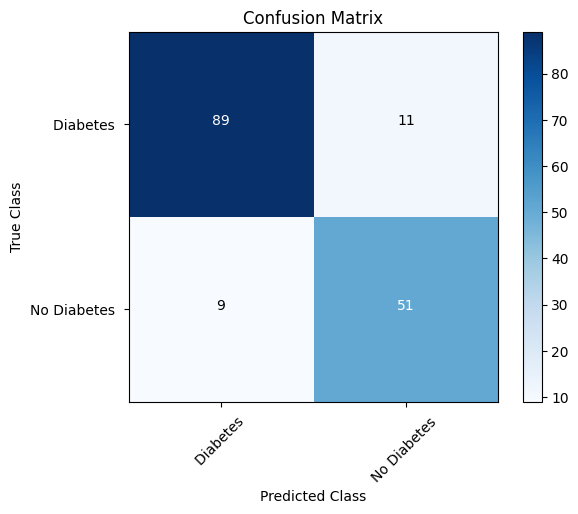

In [ ]:
#LightGBM
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model4 = LGBMClassifier(random_state=45, n_estimators= 10000, max_depth=8)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
fpr_Model4, tpr_Model4, thresholds_Model4 = roc_curve(y_test, y_pred)
roc_auc_Model4 = auc (fpr_Model4, tpr_Model4)
precision_Model4, recall_Model4, th_Model4 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model4,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features =Model4.feature_importances_
features

array([1395, 4499, 2141, 2755, 2991, 3940, 6789, 3254], dtype=int32)

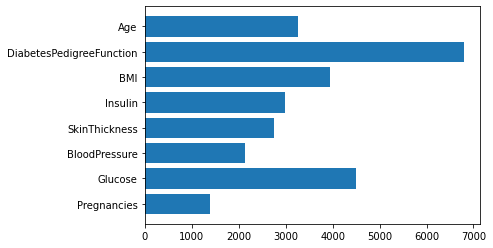

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

Learning rate set to 0.008515
0:	learn: 0.6879244	total: 51.4ms	remaining: 51.4s
1:	learn: 0.6842111	total: 53.7ms	remaining: 26.8s
2:	learn: 0.6789181	total: 55.7ms	remaining: 18.5s
3:	learn: 0.6746849	total: 58.3ms	remaining: 14.5s
4:	learn: 0.6688339	total: 60.7ms	remaining: 12.1s
5:	learn: 0.6645786	total: 63.2ms	remaining: 10.5s
6:	learn: 0.6604362	total: 65.7ms	remaining: 9.32s
7:	learn: 0.6562276	total: 68.1ms	remaining: 8.45s
8:	learn: 0.6517947	total: 70.6ms	remaining: 7.77s
9:	learn: 0.6482802	total: 73.4ms	remaining: 7.26s
10:	learn: 0.6437025	total: 76.2ms	remaining: 6.86s
11:	learn: 0.6397809	total: 81.6ms	remaining: 6.72s
12:	learn: 0.6353467	total: 84ms	remaining: 6.38s
13:	learn: 0.6323282	total: 86.4ms	remaining: 6.08s
14:	learn: 0.6279733	total: 88.8ms	remaining: 5.83s
15:	learn: 0.6245810	total: 91.3ms	remaining: 5.62s
16:	learn: 0.6214558	total: 93.7ms	remaining: 5.42s
17:	learn: 0.6185901	total: 96.2ms	remaining: 5.25s
18:	learn: 0.6148297	total: 98.5ms	remaining: 

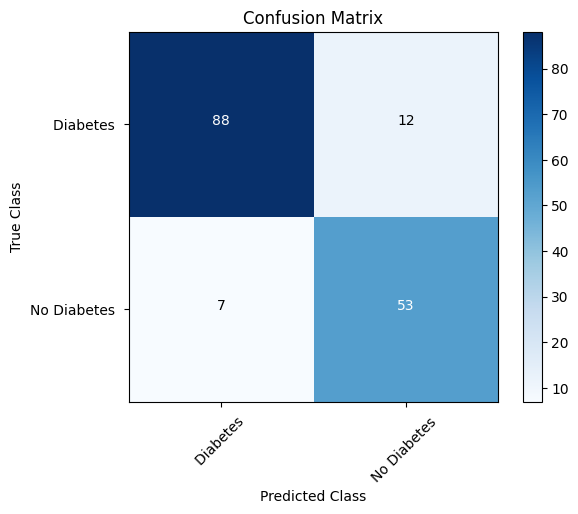

In [ ]:
#CAT Boost
X = df_upsampled.drop(["Outcome"],axis=1)
Y = df_upsampled["Outcome"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model5 = CatBoostClassifier(random_state=45, n_estimators=1000, max_depth=7)
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
fpr_Model5, tpr_Model5, thresholds_Model5 = roc_curve(y_test, y_pred)
roc_auc_Model5 = auc (fpr_Model5, tpr_Model5)
precision_Model5, recall_Model5, th_Model5 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model5,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']
features =Model5.feature_importances_
features

array([ 9.44744506, 20.14187054,  8.55952511,  9.01507934,  8.00256548,
       18.13168471, 11.88218385, 14.8196459 ])

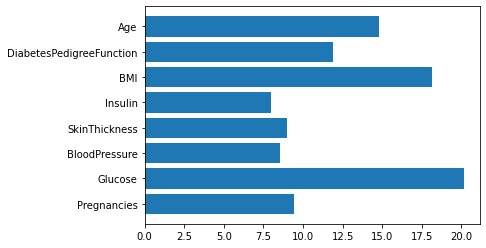

In [ ]:
plt.figure(facecolor='w')
plt.barh(featur_names,features)
plt.show()

In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [ ]:
X = data.drop(["Outcome"],axis=1)
Y = data["Outcome"]

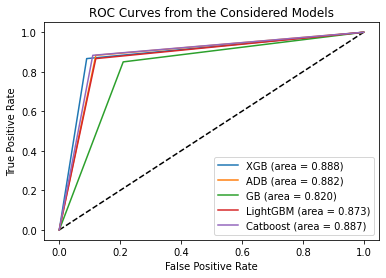

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Model1, tpr_Model1, label='XGB (area = %0.3f)' % roc_auc_Model1)
plt.plot(fpr_Model2, tpr_Model2, label='ADB (area = %0.3f)' % roc_auc_Model2)
plt.plot(fpr_Model3, tpr_Model3, label='GB (area = %0.3f)' % roc_auc_Model3)
plt.plot(fpr_Model4, tpr_Model4, label='LightGBM (area = %0.3f)' % roc_auc_Model4)
plt.plot(fpr_Model5, tpr_Model5, label='Catboost (area = %0.3f)' % roc_auc_Model5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves from the Considered Models')
plt.legend(loc='best')
plt.show()